### Hay que usar el código a partir de la función hacia abajo, lo marco con otra celda de estas

Verificar que los siguientes import también los tengan
* import json
* import requests

In [1]:
import pandas as pd
import os
import json
import requests
import matplotlib.pyplot as plt

In [ ]:
#endpoint = "http://api.worldbank.org/v2/indicator?format=json"
#endpoint = "http://api.worldbank.org/v2/country/all/indicator/NY.GDP.MKTP.KD.ZG?format=json"
#endpoint = "http://api.worldbank.org/v2/countries?format=json"
#endpoint = "http://api.worldbank.org/v2/sources/57/country/all/series/NY.GDP.MKTP.PP.CD/time/all/data?format=json"
#endpoint = "http://api.worldbank.org/v2/country/all/indicator/NY.GDP.PCAP.CD?format=json&per_page=16104"
endpoint = "http://api.worldbank.org/v2/country/all/indicator/SP.DYN.CDRT.IN?format=json"

response = requests.get(endpoint)

print(response)

In [ ]:
response = response.json()

In [ ]:
response[1][0]["country"]["value"]

In [ ]:
total_registers = response[0]["total"]
total_registers

In [ ]:
endpoint = f"http://api.worldbank.org/v2/country/all/indicator/SP.DYN.CDRT.IN?format=json&per_page={total_registers}"

response = requests.get(endpoint)

print(response)
response = response.json()

In [ ]:
print(json.dumps(response, indent=4))

In [ ]:
test = pd.DataFrame(response[1])
test

In [ ]:
new = pd.DataFrame()
new["country"] = ""
new["countryiso3code"] = ""
new["date"] = ""
new["value"] = ""
new["indicator"] = ""
new["description"] = ""

for idx, row in test.iterrows():
    
    new.loc[idx,"country"] = dict(row["country"])["value"]
    new.loc[idx,"countryiso3code"] = row["countryiso3code"]
    new.loc[idx,"date"] = row["date"]
    new.loc[idx,"value"] = row["value"]
    new.loc[idx,"indicator"] = dict(row["indicator"])["id"]
    new.loc[idx,"description"] = dict(row["indicator"])["value"]
        
    #print(f'country: {dict(row["country"])["value"]} - indicator : {dict(row["indicator"])["id"]} - value : {row["value"]}')
    
new

# A partir de aquí hacia abajo hay que copiar el código

In [2]:
# Function that gets the values from the World Bank
def get_deaths_per_million_DGP_WBApi():
    # Create the endpoint for API request
    endpoint = "http://api.worldbank.org/v2/country/all/indicator/SP.DYN.CDRT.IN?format=json"
    # Get the initial data in the first request (paged request)
    response = requests.get(endpoint).json()
    # Get the total number of registers to get all the data in the data set
    total_registers = response[0]["total"]
    # Make the request to include all data
    endpoint = f"http://api.worldbank.org/v2/country/all/indicator/SP.DYN.CDRT.IN?format=json&per_page={total_registers}"
    response = requests.get(endpoint).json()
    # Get the Data only
    data_df = pd.DataFrame(response[1])

    # Create final DataFrame with the required columns
    new = pd.DataFrame()
    new["country"] = ""
    new["countryiso3code"] = ""
    new["date"] = ""
    new["value"] = ""
    new["indicator"] = ""
    new["description"] = ""

    # From the World Bank Data, just extract the needed one
    for idx, row in data_df.iterrows():
        # Add each row to the final DataFrame
        new.loc[idx,"country"] = dict(row["country"])["value"]
        new.loc[idx,"countryiso3code"] = row["countryiso3code"]
        new.loc[idx,"date"] = row["date"]
        new.loc[idx,"value"] = row["value"]
        new.loc[idx,"indicator"] = dict(row["indicator"])["id"]
        new.loc[idx,"description"] = dict(row["indicator"])["value"]

    # Return the DataFrame
    return new


In [7]:
# Call the funciton and store it in a variable to treat the data after
raw_data = get_deaths_per_million_DGP_WBApi()

In [8]:
# copy the data in case we need the raw data again
DpM_Mundo = raw_data.copy()

In [9]:
# Get the information from the World in General
test = DpM_Mundo["countryiso3code"] == "WLD"
DpM_Mundo = DpM_Mundo.loc[test]
# Clean the DataFrame
DpM_Mundo = DpM_Mundo.dropna(subset=['value'])
# Sort values by date ascending
DpM_Mundo = DpM_Mundo.sort_values(by=['date'], ascending=True)
DpM_Mundo.shape

(59, 6)

#### A partir de aquí ya es el código que tienen, solo verificar el nombre del dataframe y columnas que se mandan llamar

* eje x = DpM_Mundo["date"]
* eje y = DpM_Mundo["value"]

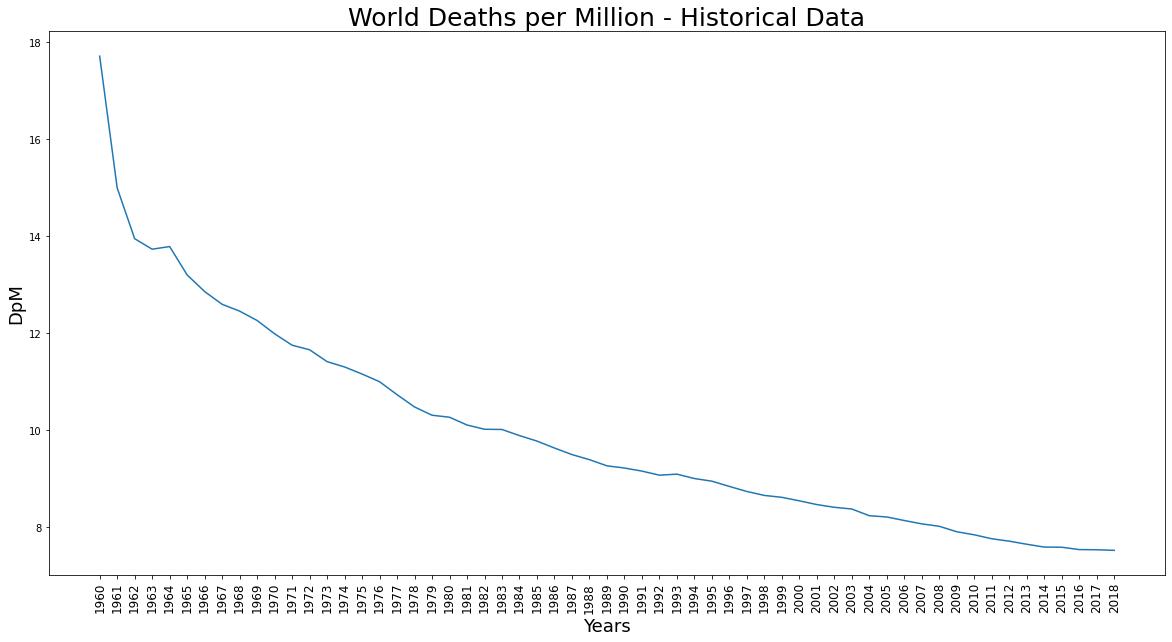

In [10]:
plt.figure(figsize=(20,10))
plt.plot(DpM_Mundo["date"],DpM_Mundo["value"])
plt.title("World Deaths per Million - Historical Data",fontsize=25)
plt.xlabel("Years",fontsize=18)
plt.ylabel("DpM",fontsize=18)
plt.xticks(rotation="vertical",fontsize=12)
plt.show()